In [1]:
!gdown --id 1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g -O CIFAR10.tar.gz
!tar xzf CIFAR10.tar.gz

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1Y1vgzPvMeVcXSxDfOlCVia7wsU7p8M6g
To: /content/CIFAR10.tar.gz
100% 19.8M/19.8M [00:00<00:00, 35.6MB/s]


#First Section

In this section we are going to visualize datas of dataset and do some preprocessing on data to give them as an input to Fully connected neural network.



**Import dependencies**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as matimg
import glob
import cv2
import time

**Visualizing Dataset**


We define the path of training and test sets and draw first pictures of 10 classes we have.

In [3]:
train_path = '/content/CIFAR10/train/'
test_path = '/content/CIFAR10/test/'
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

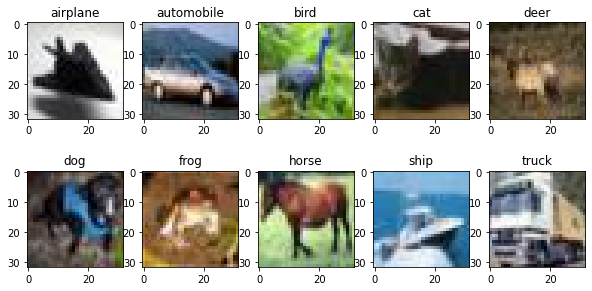

In [4]:
figure,axis = plt.subplots(2,5,figsize=(10,5))
i = 0
j = 0
for each_class in classes:
  if j == 5:
    j = 0
    i += 1
  axis[i,j].imshow(matimg.imread(train_path + each_class + '/0000.jpg'))
  axis[i,j].set_title(each_class)
  j += 1

**1.1 Preprocessing**


We have to put all the images in test and training sets in matrixes.
We use READ_IMAGES function to read all of the images of subfolders and add them to X_train,X_test matrices.


In [5]:
def read_images(path):
  images = list()
  # Reading images of a path 
  images = [cv2.imread(image) for image in glob.glob(path)]
  return images

In [6]:
classes = classes[:4]
X_train = list()
X_test = list()
for each_class in classes:
  # Filling X_train matrix from all images read from the path
  X_train += read_images(train_path+each_class+'/*.jpg')
  # Filling X_test matrix
  X_test += read_images(test_path+each_class+'/*.jpg')
# we didnt create numpy array at first cause the size was changing and we didnt know the size
X_train = np.array(X_train)
X_test = np.array(X_test)

As we can see we have 4000 test samples with 32 width and 32 hight and 3 channels (RGB) and 20000 RGB train samples.

In [7]:
print(X_test.shape)
# number of samples,images sizes width,higth,dimensions
print(X_train.shape)

(4000, 32, 32, 3)
(20000, 32, 32, 3)


As we are using supervised learning we have to create labels for each picture to define which class a picture is in. we have 4 classes and we have samples/4 sample for each class and we define their output as one.

In [8]:
# creating labels
def one_hot(input_shape):
  labels = np.zeros(input_shape)
  n_samples = input_shape[0]
  n_classes = input_shape[1]
  samples_for_each_class = n_samples / n_classes
  for i in range (n_samples):
    if i < samples_for_each_class:
      # labels for first class
      labels[i,0] = 1
    elif i < samples_for_each_class * 2 :
      # labels for second class
      labels[i,1] = 1
      # lables for third class
    elif i < samples_for_each_class * 3 :
      labels[i,2] = 1
    else:
      # labels for fourh class
      labels[i,3]=1
  return labels
y_train = one_hot((20000,4))
y_test = one_hot ((4000,4))


**1.2 RGB to gray scale**

Because in RGB pictures we have three channels the computation is really heavy so we convert the pictures to gray scale to have only one channel and the values of each pixel is between 0 to 255.

In [9]:
# converting rgb to gray
def rgb2gray(rgb):
    r, g, b = rgb[:, :, :, 0], rgb[:, :, :,1], rgb[:, :, :, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [10]:
X_train = rgb2gray(X_train)
X_test = rgb2gray(X_test)

As we can see channels are removed and now we have n samples with 32x32 size.

In [11]:
#  fourth index(value = 3) which shows RGB has been removed and we have one dimension right now
X_train.shape
X_test.shape

(4000, 32, 32)

**1.3 Normalizing**

Due to heavy computation in FNN its better to have small numbers so we divide all the gray scale numbers /255 to have all numbers between 0 to 1.

In [12]:
# for putting numbers between 0 to 1 divide them 255
X_train = (X_train/255)
X_test =(X_test/255)

In [13]:
print(X_train)
print(X_test)

[[[0.32731137 0.31162667 0.29061294 ... 0.22714902 0.21930667 0.21538549]
  [0.27633608 0.27633608 0.2724149  ... 0.23454431 0.22714902 0.22278078]
  [0.21820118 0.22604353 0.23388588 ... 0.23595216 0.22670196 0.22418863]
  ...
  [0.27234784 0.27392471 0.2801902  ... 0.28475176 0.28660667 0.28801451]
  [0.24274863 0.24432549 0.25310431 ... 0.27173137 0.27565255 0.27520549]
  [0.22859843 0.23251961 0.23895412 ... 0.28087255 0.27997843 0.27605725]]

 [[0.70128824 0.70520941 0.70435765 ... 0.55189176 0.30147725 0.30972902]
  [0.73108078 0.73108078 0.72004235 ... 0.53631608 0.28920667 0.28480078]
  [0.78670235 0.78278118 0.76944078 ... 0.52690353 0.30136392 0.28150902]
  ...
  [0.6326502  0.62872902 0.61114706 ... 0.64373098 0.62804627 0.64999647]
  [0.58369882 0.55249843 0.54069255 ... 0.61992588 0.59134784 0.65016549]
  [0.52112902 0.48579608 0.48786235 ... 0.56660627 0.49331843 0.55997843]]

 [[0.48791922 0.48791922 0.49026353 ... 0.51779608 0.52014039 0.52131255]
  [0.48791922 0.487919

**1.4 Flatting Data**

The input layer of FNN has 1024 units but our samples are 32x32(area) to give an input to net we have to put them together for that we have to reshape each sample to a line array.

In [14]:
# change a 32x32 square to 1024 one dimensional array
X_train = X_train.reshape(-1,1024)
X_test = X_test.reshape(-1,1024)

In [15]:
print(X_train.shape)
print(X_test.shape)

(20000, 1024)
(4000, 1024)


**1.5 Shuffle Data**

Due to overfitting we shuffle the train set to samples within one classes dont be next to eachother.

In [16]:
# shuffling data using premutation method
def shuffle_data(a, b):
  p = np.random.permutation(len(a))
  return (a[p], b[p])
   

In [17]:
X_train, y_train = shuffle_data(X_train, y_train)
X_test, y_test = shuffle_data(X_test, y_test)

#Second Section

**Sigmoid Function**

We use sigmoid function to tell the activation of each unit.




In [18]:
def sigmoid(x):
  return 1 / (1 + (np.exp(-x)))

**Weight and Bias**

In [19]:
# due to discription W(n,m) n = next layer m = current layer
# random initialization
W0 = np.random.normal(size=(16,1024))
W1 = np.random.normal(size=(16, 16))
W2 = np.random.normal(size=(4, 16))
# due to discription b(n,1) n = next layer
# zero initialization
b0 = np.zeros((16, 1)) 
b1 = np.zeros((16, 1))
b2 = np.zeros((4, 1))

**Feedforward**

As said in discription of project we have to predict the output of net using following formula within each layer.


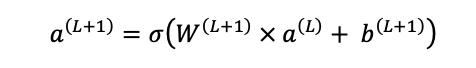


we compute units of next layer using wieght and bias between layers and pass the result to sigmoid to make thier values between 0 and 1. At last we check the predicted value with it result to see if the net predicted correctly or not. The more correct results makes accuracy higher.

In [20]:
# prediction using feedforward
# a(L+1) = sigmoid (W(L+1) * a(L) + b(L+1)
def feedforward(W0, W1, W2, b0, b1, b2):
    count = 0
    for i in range(200):
      X = X_train[i].reshape(-1,1)
      a1 = sigmoid(np.dot(W0, X) + b0)
      a2 = sigmoid(np.dot(W1,a1) + b1)
      a3 = sigmoid(np.dot(W2,a2) + b2)
      # check if the result is equal to predicted value
      if a3.argmax() == y_train[i].argmax():
        count += 1
    # correct answers over all answers
    accuracy = count / 200
    print('Accuracy: {}%'.format(accuracy*100))

In [21]:
feedforward(W0, W1, W2, b0, b1, b2)

Accuracy: 24.0%


We have 22 percent accuracy (near 25%) because the weights are initialized random and we haven't use gradient descent to minimize the cost based on the weights.

#Third Section

**Hyperparameters**

We have to define hyperparameters which make the values of parameters.

In [22]:
num_epoch = 10
batch_size = 16
learning_rate = 0.3
num_samples = 200

**Back propagation**

For caluclating Back propagation we have to compute derivative of what effects the result of cost function which is defined in a below picture.(sum square error)

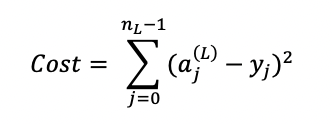

Then we can see the a affect the cost and we know a is computed based on weights and biases so we have to compute derivative based on a,b,w.
This is an example of chain rule for last layer and we can do the same for others layer as well.

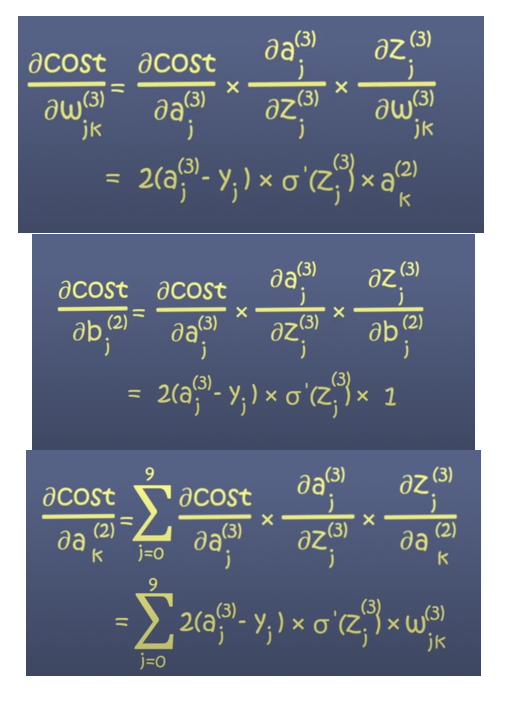

In [23]:
def draw_plot(x_axis,y_axis,x_label,y_label,title):
  plt.plot(x_axis,y_axis)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.show()

In [24]:
# putting together all X_training and Y_train in a set
train_set = list(zip(X_train, y_train))
# putting together all test sets
test_set = list(zip(X_test, y_test))
costs = []

def backpropagation(W0, W1, W2, b0, b1, b2):
  # for calculating time and compare it with vectorization algorithm
  start = time.time()
  for i in range(num_epoch):
    np.random.shuffle(train_set)
    # creating batches
    batches = []
    for x in range(0,num_samples,batch_size):
      batches.append(train_set[x:x+batch_size])
    for batch in batches:
        # grad of matrixes has same size of the actual matrixes
        grad_w0 = np.zeros((16, 1024))
        grad_w1 = np.zeros((16, 16))
        grad_w2 = np.zeros((4, 16))
        grad_b0 = np.zeros((16, 1))
        grad_b1 = np.zeros((16, 1))
        grad_b2 = np.zeros((4, 1))

        for image, label in batch:
          # (1024,)(4,) -> (1024,1)(4,1)
          image = image.reshape(-1,1)
          label = label.reshape(-1,1)
          # z1 = W0 * image + b0
          a1 = sigmoid(np.dot(W0,image) + b0)
          # z2 = W1 * a1 + b1
          a2 = sigmoid(np.dot(W1,a1) + b1)
          # z3 = W2 * a2 + b2
          a3 = sigmoid(np.dot(W2,a2) + b2)

          # cost/w2
          for j in range(grad_w2.shape[0]):
              for k in range(grad_w2.shape[1]):
                  grad_w2[j, k] +=  a2[k, 0] * (1 - a3[j, 0])  * a3[j, 0]  * 2 * (a3[j, 0] - label[j, 0])
            # cost/b2
          for j in range(grad_b2.shape[0]):
                  grad_b2[j, 0] +=  a3[j, 0] * (1 - a3[j, 0]) * 2 * (a3[j, 0] - label[j, 0])  * 1

            # cost/a2
          delta3 = np.zeros((16, 1))
          for k in range(16):
              for j in range(4):
                  delta3[k, 0] += W2[j, k] * a3[j, 0] * (1 - a3[j, 0]) * 2 * (a3[j, 0] - label[j, 0]) 
            
            # cost/w1
          for k in range(grad_w1.shape[0]):
              for m in range(grad_w2.shape[1]):
                  grad_w1[k, m] += a1[m, 0] * delta3[k, 0] * a2[k,0] * (1 - a2[k, 0]) 
            
            # cost/b1
          for k in range(grad_b1.shape[0]):
                  grad_b1[k, 0] += delta3[k, 0] * a2[k, 0] * (1 - a2[k, 0])
            # cost/a1
          delta2 = np.zeros((16, 1))
          for m in range(16):
              for k in range(16):
                  delta2[m, 0] += W1[k, m] * delta3[k, 0] * a2[k, 0] * (1 - a2[k, 0]) 
            
            # cost/w0
          for m in range(grad_w0.shape[0]):
              for v in range(grad_w0.shape[1]):
                  grad_w0[m, v] += delta2[m, 0] * a1[m,0] * (1 - a1[m, 0]) * image[v, 0]
            # cost/b0
          for m in range(grad_b0.shape[0]):
                  grad_b0[m, 0] += delta2[m, 0] * a1[m, 0] * (1 - a1[m, 0])
        
        # updating Weights and biases
        W2 -= (learning_rate * (grad_w2 / batch_size))
        W1 -= (learning_rate * (grad_w1 / batch_size))
        W0 -= (learning_rate * (grad_w0 / batch_size))
        
        b2 -= (learning_rate * (grad_b2 / batch_size))
        b1 -= (learning_rate * (grad_b1 / batch_size))
        b0 -= (learning_rate * (grad_b0 / batch_size))
    # calulcating
    cost = 0
    correct = 0
    for train_data in train_set[:num_samples]:
        # image
        a0 = train_data[0].reshape(-1,1)

        a1 = sigmoid(np.dot(W0,a0) + b0)
        a2 = sigmoid(np.dot(W1,a1) + b1)
        a3 = sigmoid(np.dot(W2,a2) + b2)

        y_label = train_data[1].reshape(-1,1)

        if a3.argmax() == train_data[1].argmax():
          correct+= 1
        # square sum error
        for j in range(4):
            cost += ((a3[j, 0] - y_label[j,  0]) ** 2)
            
    costs.append(cost / num_samples)  
  stop = time.time()
  draw_plot([i for i in range(0,num_epoch)],costs,'epochs','loss','model loss')
  print("Spent time: ", stop - start)
  print("Accuracy:" ,(correct / num_samples) * 100)   


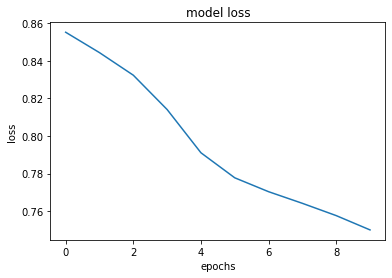

Spent time:  96.54625463485718
Accuracy: 38.5


In [25]:
backpropagation(W0, W1, W2, b0, b1, b2)

As we can see the process take 1.5 minutes for 200 sample data and with accuracy 38.5%.

#Fourth Section

Because the matrix multiplication is so slow we use vectorization which we can make use of parallesim of cpus and gpus.

**Hyperparameters**

In [26]:
# change num_epoch is 20
num_epoch = 20
batch_size = 16
learning_rate = 0.3
num_samples = 200

**Vectorization**

In [27]:
costs = []
def vectorization(W0, W1, W2, b0, b1, b2):
  start = time.time()
  for i in range(num_epoch):
    np.random.shuffle(train_set)
    batches = []
    for x in range(0,num_samples,batch_size):
      batches.append(train_set[x:x+batch_size])
    for batch in batches:
        grad_w0 = np.zeros((16, 1024))
        grad_w1 = np.zeros((16, 16))
        grad_w2 = np.zeros((4, 16))
        grad_bias0 = np.zeros((16, 1))
        grad_bias1 = np.zeros((16, 1))
        grad_bias2 = np.zeros((4, 1))

        for image, label in batch:
            image = image.reshape(-1,1)
            label = label.reshape(-1,1)
            a1 = sigmoid(W0 @ image + b0)
            a2 = sigmoid(W1 @ a1 + b1)
            a3 = sigmoid(W2 @ a2 + b2)
            # last layer
            grad_w2 += (2 *  (a3) * (1 - a3) * (a3 - label)) @ np.transpose(a2)
            grad_bias2 += ( 2 *  (a3) * (1-a3) * (a3- label) )
            # second layer
            delta3 = np.zeros((16, 1))
            delta3 += np.transpose(W2) @ (2 *  (a3) * (1-a3) * (a3- label)) 
            grad_w1 += ( (a2)* (1-a2) * delta3) @ np.transpose(a1)   
            grad_bias1 +=  (a2) * (1-a2) * delta3 
            #  first layer
            delta2 = np.zeros((16, 1))
            delta2 += np.transpose(W1) @ ( (a2) * (1-a2) * delta3 )
            grad_w0 += ( (a1) * (1-a1) * delta2 )  @ np.transpose(image)
            grad_bias0 += ( (a1) * (1-a1) * delta2 )
        

        W2 -= (learning_rate * (grad_w2 / batch_size))
        W1 -= (learning_rate * (grad_w1 / batch_size))
        W0 -= (learning_rate * (grad_w0 / batch_size))
        
        b2 -= (learning_rate * (grad_bias2 / batch_size))
        b1 -= (learning_rate * (grad_bias1 / batch_size))
        b0 -= (learning_rate * (grad_bias0 / batch_size))
    
    cost = 0
    correct_train = 0
    correct_test = 0
    # for training_set we start computing based on new W and B
    for train_data in train_set[:num_samples]:
        a0 = train_data[0].reshape(-1,1)
        a1 = sigmoid(W0 @ a0 + b0)
        a2 = sigmoid(W1 @ a1 + b1)
        a3 = sigmoid(W2 @ a2 + b2)
    
        if a3.argmax() == train_data[1].argmax():
          correct_train += 1
        y_label = train_data[1].reshape(-1,1)
        for j in range(0,4):
            cost +=((a3[j, 0] - y_label[j,  0]) ** 2)
      # creating an array of cost because we want to draw a plot  
    costs.append(cost / num_samples)  
    # for test_set we start computing based on new W and B
    for test_data in test_set:
      a0 = test_data[0].reshape(-1,1)
      a1 = sigmoid(W0 @ a0 + b0)
      a2 = sigmoid(W1 @ a1 + b1)
      a3 = sigmoid(W2 @ a2 + b2)
      if a3.argmax() == test_data[1].argmax():
        correct_test += 1
  stop = time.time() 
  run_time = stop - start
  return costs,(correct_train/num_samples),(correct_test/len(test_set)),run_time


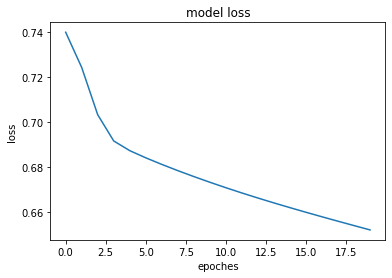

running time is:  5.862049579620361
Accuracy: 46.0


In [28]:
costs,acc_training,acc_test,run_time = vectorization(W0, W1, W2, b0, b1, b2)
draw_plot([i for i in range(0,num_epoch)],costs,'epoches','loss','model loss')
print("running time is: ", run_time)
print("Accuracy:" , acc_training * 100) 


We can see the speed is about 16 time faster for 200 sample data.

**Run 10 times**

We run the algorithm for 10 times and the mean accuracy is about 32% percent.

In [29]:
all_trainings = []
for i in range(10):
  costs,training,tests,run_time = vectorization(W0,W1,W2,b0,b1,b2)
  all_trainings.append(training)

print('Mean accuracy for 10 times: ', sum(all_trainings)/num_samples)



Mean accuracy for 10 times:  0.03295


#Fifth part

**Hyper parameters**

In [30]:
num_epoch = 40
batch_size = 16
learning_rate = 0.3
# changed the sample size
num_samples = 8000

We can see for 1 time for 8000 sample data accuracies.

In [35]:
costs, train_acc, test_acc, run_time = vectorization(W0,W1,W2,b0,b1,b2)
print('Run time: ', run_time)
print('Train Accuracy: {}%'.format(train_acc*100)) 
print('Test Accuracy: {}%'.format(test_acc*100)) 


Run time:  118.44423484802246
Train Accuracy: 56.15%
Test Accuracy: 49.575%


we can see for 8000 dataset using vectorization the runtime is equal to 200 sample without vectorization.

We can see for 10 times for 8000

In [38]:
all_costs = []
all_trains = []
all_test = []
for i in range(10):
  # compute vectorization
  epochs_costs, train_acc, test_acc, run_time = vectorization(W0,W1,W2,b0,b1,b2)
  all_trains.append(train_acc)
  all_test.append(test_acc)
  all_costs.append(epochs_costs)

mean_train = (sum(all_trains) / len(all_trains)) * 100
mean_test = (sum(all_test) / len(all_test) ) * 100
print('Mean train accuracy {} %'.format(mean_train))
print('Mean test accuracy {} %'.format(mean_test))

Mean train accuracy 66.49374999999999 %
Mean test accuracy 49.535000000000004 %


We can see for 10 time 8000 samples the train accuracy 66% and for test 49%

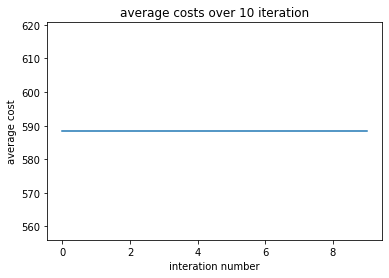

In [39]:
all_averages = []
for i in range(len(all_costs)):
  summ = 0
  for j in range(len(all_costs[0])):
    summ += all_costs[i][j]
  all_averages.append(summ)

draw_plot([i for i in range(0,10)],all_averages,'interation number','average cost','average costs over 10 iteration')


As you can see because we are computing a same alogrithm for 10 times their costs are nearly the same each time so we have a flatten line.

#Bonus Point (1)

In [33]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, losses,optimizers
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from sklearn.metrics import confusion_matrix, classification_report

In [34]:
gpus = tf.config.list_physical_devices('GPU')

tf.config.set_logical_device_configuration(gpus[0], [tf.config.LogicalDeviceConfiguration(memory_limit=15000)])

**Load Dataset**

In [40]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 13s 0us/step


**1.1 Model implementation**

In [ ]:
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_18 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                  

In [ ]:
model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 31s 19ms/step - loss: 2.3555 - accuracy: 0.3803 - val_loss: 1.4416 - val_accuracy: 0.4719
Epoch 2/20
1563/1563 [==============================] - 29s 19ms/step - loss: 1.3609 - accuracy: 0.5063 - val_loss: 1.2664 - val_accuracy: 0.5476
Epoch 3/20
1563/1563 [==============================] - 30s 19ms/step - loss: 1.1905 - accuracy: 0.5758 - val_loss: 1.1335 - val_accuracy: 0.5904
Epoch 4/20
1563/1563 [==============================] - 29s 19ms/step - loss: 1.0649 - accuracy: 0.6247 - val_loss: 1.0524 - val_accuracy: 0.6363
Epoch 5/20
1563/1563 [==============================] - 29s 19ms/step - loss: 0.9705 - accuracy: 0.6603 - val_loss: 1.0575 - val_accuracy: 0.6399
Epoch 6/20
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8897 - accuracy: 0.6958 - val_loss: 0.9904 - val_accuracy: 0.6738
Epoch 7/20
1563/1563 [==============================] - 29s 18ms/step - loss: 0.8385 - accuracy: 0.7156 - val_loss: 0.9144 -

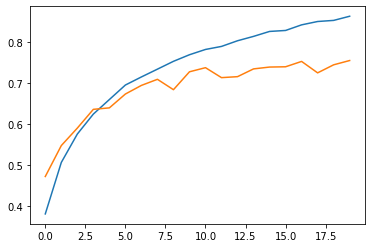

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
predictions = model.predict(test_images)
predictions_labels = []
for x in range(len(test_labels)):
  predictions_labels.append(np.argmax(predictions[x]))
print(classification_report(test_labels,predictions_labels))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1000
           1       0.90      0.84      0.87      1000
           2       0.68      0.66      0.67      1000
           3       0.62      0.52      0.56      1000
           4       0.66      0.77      0.71      1000
           5       0.72      0.66      0.69      1000
           6       0.76      0.85      0.80      1000
           7       0.84      0.74      0.79      1000
           8       0.84      0.83      0.84      1000
           9       0.82      0.87      0.85      1000

    accuracy                           0.76     10000
   macro avg       0.76      0.76      0.75     10000
weighted avg       0.76      0.76      0.75     10000



The accuray for 20 epochs and 32 batch size for validation = test 75.5% .

**1.2 Batch normalization**

Batch normalization, it is a process to make neural networks faster and more stable through adding extra layers in a deep neural network. A typical neural network is trained using a collected set of input data called batch. Similarly, the normalizing process in batch normalization takes place in batches, not as a single input. First it normalize output from activation function (z = x-m/s) then it normalize output by arbitrary parameter g  (z *g ) and then we add a abritrary parameter b to resulting product (z * g) + b and we use this in our layers (in normalization we normalize before first layer). So we have normalize data within the model itself and in the first layer.

In [ ]:
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [ ]:
model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 36s 22ms/step - loss: 1.3183 - accuracy: 0.5288 - val_loss: 1.0204 - val_accuracy: 0.6410
Epoch 2/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.8585 - accuracy: 0.7038 - val_loss: 0.9464 - val_accuracy: 0.6857
Epoch 3/20
1563/1563 [==============================] - 34s 21ms/step - loss: 0.6647 - accuracy: 0.7719 - val_loss: 0.7311 - val_accuracy: 0.7582
Epoch 4/20
1563/1563 [==============================] - 34s 21ms/step - loss: 0.5461 - accuracy: 0.8161 - val_loss: 0.6635 - val_accuracy: 0.7844
Epoch 5/20
1563/1563 [==============================] - 33s 21ms/step - loss: 0.4453 - accuracy: 0.8486 - val_loss: 0.6451 - val_accuracy: 0.7891
Epoch 6/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.3672 - accuracy: 0.8743 - val_loss: 0.7794 - val_accuracy: 0.7608
Epoch 7/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.3048 - accuracy: 0.8961 - val_loss: 0.6204 -

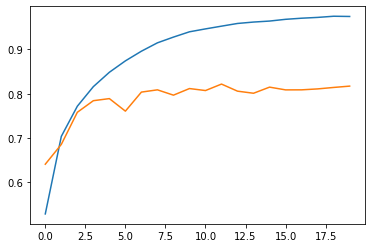

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
predictions = model.predict(test_images)
predictions_labels = []
for x in range(len(test_labels)):
  predictions_labels.append(np.argmax(predictions[x]))
print(classification_report(test_labels,predictions_labels))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1000
           1       0.90      0.91      0.91      1000
           2       0.79      0.71      0.75      1000
           3       0.76      0.56      0.65      1000
           4       0.83      0.78      0.80      1000
           5       0.67      0.79      0.73      1000
           6       0.86      0.88      0.87      1000
           7       0.84      0.86      0.85      1000
           8       0.88      0.91      0.89      1000
           9       0.86      0.90      0.88      1000

    accuracy                           0.82     10000
   macro avg       0.82      0.82      0.82     10000
weighted avg       0.82      0.82      0.82     10000



The accuracy has been improved to 82%.

**1.3 Drop out**

Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel.During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.
Dropout is implemented per-layer in a neural network.
It can be used with most types of layers, such as dense fully connected layers, convolutional layers, and recurrent layers such as the long short-term memory network layer.
Dropout may be implemented on any or all hidden layers in the network as well as the visible or input layer. It is not used on the output layer.The default interpretation of the dropout hyperparameter is the probability of training a given node in a layer, where 1.0 means no dropout, and 0.0 means no outputs from the layer.A good value for dropout in a hidden layer is between 0.5 and 0.8. Input layers use a larger dropout rate, such as of 0.8.





In [ ]:
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_16 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_33 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_17 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                      

In [ ]:
model.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 39s 24ms/step - loss: 1.8027 - accuracy: 0.3299 - val_loss: 1.3654 - val_accuracy: 0.5034
Epoch 2/20
1563/1563 [==============================] - 35s 22ms/step - loss: 1.2920 - accuracy: 0.5467 - val_loss: 1.0452 - val_accuracy: 0.6404
Epoch 3/20
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0462 - accuracy: 0.6465 - val_loss: 1.0452 - val_accuracy: 0.6501
Epoch 4/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8926 - accuracy: 0.7020 - val_loss: 0.7286 - val_accuracy: 0.7573
Epoch 5/20
1563/1563 [==============================] - 34s 22ms/step - loss: 0.7870 - accuracy: 0.7431 - val_loss: 0.7803 - val_accuracy: 0.7365
Epoch 6/20
1563/1563 [==============================] - 35s 22ms/step - loss: 0.7083 - accuracy: 0.7716 - val_loss: 0.6420 - val_accuracy: 0.7845
Epoch 7/20
1563/1563 [==============================] - 35s 22ms/step - loss: 0.6390 - accuracy: 0.7940 - val_loss: 0.6658 -

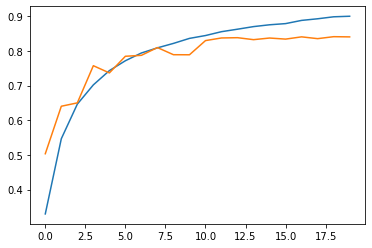

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [ ]:
predictions = model.predict(test_images)
predictions_labels = []
for x in range(len(test_labels)):
  predictions_labels.append(np.argmax(predictions[x]))
print(classification_report(test_labels,predictions_labels))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1000
           1       0.93      0.93      0.93      1000
           2       0.78      0.79      0.78      1000
           3       0.62      0.80      0.70      1000
           4       0.81      0.83      0.82      1000
           5       0.82      0.72      0.77      1000
           6       0.92      0.84      0.88      1000
           7       0.92      0.85      0.88      1000
           8       0.91      0.91      0.91      1000
           9       0.89      0.92      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000



The accuracy for drop out is 84%.

**1.4 Keras Optimizers**

*Adagrad*

Adagrad is an optimizer with parameter-specific learning rates, which are adapted relative to how frequently a parameter gets updated during training. The more updates a parameter receives, the smaller the updates.

In [41]:
model = keras.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer=optimizers.Adagrad(), loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 24s 8ms/step - loss: 2.3408 - accuracy: 0.1661 - val_loss: 2.0144 - val_accuracy: 0.2262
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 2.1055 - accuracy: 0.2124 - val_loss: 1.9338 - val_accuracy: 0.2552
Epoch 3/20
1563/1563 [==============================] - 12s 8ms/step - loss: 2.0370 - accuracy: 0.2301 - val_loss: 1.8692 - val_accuracy: 0.2823
Epoch 4/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.9790 - accuracy: 0.2523 - val_loss: 1.8008 - val_accuracy: 0.3094
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.9259 - accuracy: 0.2708 - val_loss: 1.7436 - val_accuracy: 0.3379
Epoch 6/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.8827 - accuracy: 0.2871 - val_loss: 1.6929 - val_accuracy: 0.3581
Epoch 7/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.8521 - accuracy: 0.2986 - val_loss: 1.6574 - val_ac

For Adagard the validation accuracy is about 44.10%.

*Adadelta*

Adadelta optimization is a stochastic gradient descent method that is based on adaptive learning rate per dimension to address two drawbacks:The continual decay of learning rates throughout training.
The need for a manually selected global learning rate.
Adadelta is a more robust extension of Adagrad that adapts learning rates based on a moving window of gradient updates, instead of accumulating all past gradients. This way, Adadelta continues learning even when many updates have been done. Compared to Adagrad, in the original version of Adadelta you don't have to set an initial learning rate. In this version, the initial learning rate can be set, as in most other Keras optimizers.

In [ ]:
model.compile(optimizer=optimizers.Adadelta(), loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 14s 8ms/step - loss: 1.6440 - accuracy: 0.3839 - val_loss: 1.4973 - val_accuracy: 0.4410
Epoch 2/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6340 - accuracy: 0.3896 - val_loss: 1.4907 - val_accuracy: 0.4414
Epoch 3/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6325 - accuracy: 0.3918 - val_loss: 1.4925 - val_accuracy: 0.4417
Epoch 4/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6277 - accuracy: 0.3911 - val_loss: 1.4945 - val_accuracy: 0.4403
Epoch 5/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6293 - accuracy: 0.3913 - val_loss: 1.4936 - val_accuracy: 0.4421
Epoch 6/20
1563/1563 [==============================] - 13s 8ms/step - loss: 1.6256 - accuracy: 0.3933 - val_loss: 1.4877 - val_accuracy: 0.4452
Epoch 7/20
1563/1563 [==============================] - 12s 8ms/step - loss: 1.6213 - accuracy: 0.3928 - val_loss: 1.4824 - val_ac

For Adadelta The accuracy is about 45.71%.

*RMSprop*

The gist of RMSprop is to Maintain a moving (discounted) average of the square of gradients Divide the gradient by the root of this average.The centered version additionally maintains a moving average of the gradients, and uses that average to estimate the variance.



In [ ]:
model.compile(optimizer=optimizers.RMSprop(), loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.5785 - accuracy: 0.8383 - val_loss: 0.5921 - val_accuracy: 0.8277
Epoch 2/20
1563/1563 [==============================] - 23s 15ms/step - loss: 0.5821 - accuracy: 0.8412 - val_loss: 0.6096 - val_accuracy: 0.8111
Epoch 3/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.5863 - accuracy: 0.8378 - val_loss: 0.5978 - val_accuracy: 0.8183
Epoch 4/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.5796 - accuracy: 0.8362 - val_loss: 0.8011 - val_accuracy: 0.8048
Epoch 5/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.5851 - accuracy: 0.8410 - val_loss: 0.6117 - val_accuracy: 0.8263
Epoch 6/20
1563/1563 [==============================] - 15s 10ms/step - loss: 0.5902 - accuracy: 0.8414 - val_loss: 0.5992 - val_accuracy: 0.8329
Epoch 7/20
1563/1563 [==============================] - 15s 9ms/step - loss: 0.5942 - accuracy: 0.8412 - val_loss: 0.5780 - va

The accuracy of RMSprop is 83.78%.

*Nadam*

Optimizer that implements the NAdam algorithm. Much like Adam is essentially RMSprop with momentum, Nadam is Adam with Nesterov momentum.



In [42]:
model.compile(optimizer=optimizers.Nadam(), loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [43]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1563/1563 [==============================] - 94s 51ms/step - loss: 1.7460 - accuracy: 0.3585 - val_loss: 1.2762 - val_accuracy: 0.5368
Epoch 2/20
1563/1563 [==============================] - 77s 49ms/step - loss: 1.2254 - accuracy: 0.5753 - val_loss: 1.2622 - val_accuracy: 0.5666
Epoch 3/20
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9990 - accuracy: 0.6663 - val_loss: 0.9042 - val_accuracy: 0.6932
Epoch 4/20
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8646 - accuracy: 0.7131 - val_loss: 0.7592 - val_accuracy: 0.7438
Epoch 5/20
1563/1563 [==============================] - 76s 49ms/step - loss: 0.7636 - accuracy: 0.7509 - val_loss: 0.6682 - val_accuracy: 0.7754
Epoch 6/20
1563/1563 [==============================] - 76s 49ms/step - loss: 0.6902 - accuracy: 0.7754 - val_loss: 0.6629 - val_accuracy: 0.7813
Epoch 7/20
1563/1563 [==============================] - 77s 49ms/step - loss: 0.6341 - accuracy: 0.7957 - val_loss: 0.8234 -

In [44]:
predictions = model.predict(test_images)
predictions_labels = []
for x in range(len(test_labels)):
  predictions_labels.append(np.argmax(predictions[x]))
print(classification_report(test_labels,predictions_labels))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1000
           1       0.91      0.94      0.93      1000
           2       0.75      0.80      0.77      1000
           3       0.77      0.62      0.69      1000
           4       0.85      0.81      0.83      1000
           5       0.80      0.73      0.76      1000
           6       0.84      0.91      0.87      1000
           7       0.83      0.90      0.87      1000
           8       0.92      0.90      0.91      1000
           9       0.90      0.90      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



In [45]:
print(confusion_matrix(test_labels, predictions_labels))

[[878  11  49  10   3   2   2   6  26  13]
 [  7 940   0   2   0   1   2   1  13  34]
 [ 50   1 798  14  34  34  41  20   2   6]
 [ 14   4  71 620  41 106  76  42  11  15]
 [ 11   3  59  24 815  14  33  38   2   1]
 [  9   2  42 101  30 729  18  60   3   6]
 [  7   1  21  17  11   7 912  13   7   4]
 [ 16   1  18  15  18  16   5 904   1   6]
 [ 57  18   5   3   1   0   1   3 901  11]
 [ 27  47   2   4   3   0   1   3  13 900]]


The accuracy of Nadam is 84.84%.

**1.5 f1, recall, precision**

In the previous activity we have seen that the accuracy of nadam is the best over other optimizers.

confusion matrix: A confusion matrix is a summary of prediction results on a classification problem.The number of correct and incorrect predictions are summarized with count values and broken down by each class.

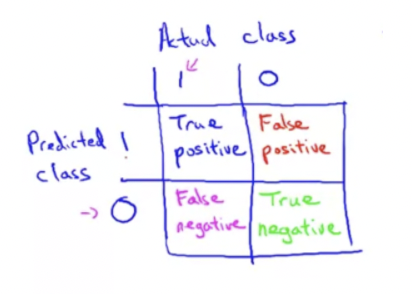


Precision : Of all the cases we predicted true (y=1), what fraction actually are true.

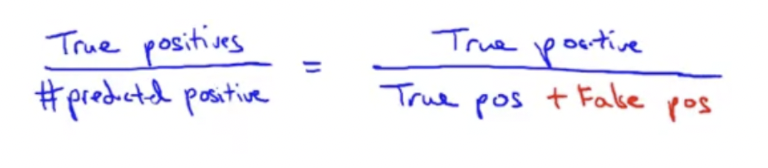

Recall : Off all the cases which actually are true, How many did we predicted true.

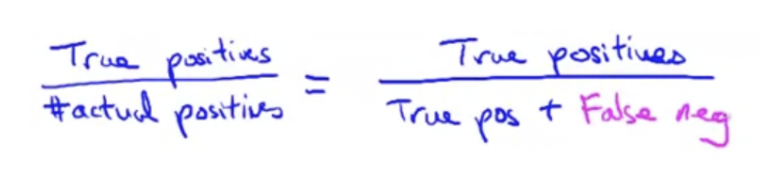

F score : The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. It is primarily used to compare the performance of two classifiers. Suppose that classifier A has a higher recall, and classifier B has higher precision. In this case, the F1-scores for both the classifiers can be used to determine which one produces better results.

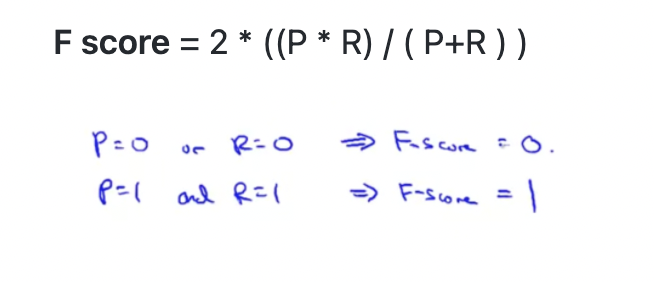

#Bonus point (2)

2.1 Data augmentation

Data augmentation means creating new data based on the available data we have such as rotation of picture,croping it or different color. This makes us to have a lot of data without exploring alot. we use this for overfitting problam by adding more data. 
No this technic wont be applied for test data set because we use it for getting data for train set.

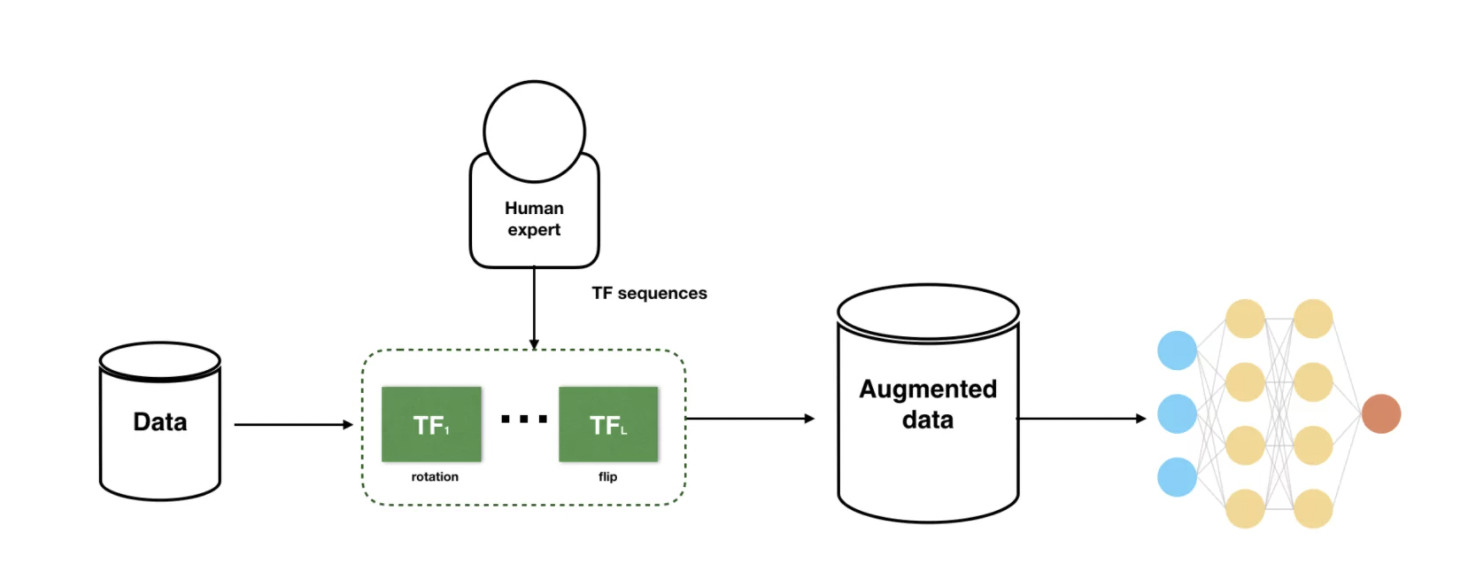

Classic image processing activities for data augmentation are:padding,random,rotating,re-scaling,vertical and horizontal flipping,translation ( image is moved along X, Y direction),cropping,zooming,darkening & brightening/color,modification,grayscaling,changing contrast,adding noise,random erasing.

**2.2 Data augmentation sample**

In [49]:
classes = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Text(0.5, 1.0, 'truck')

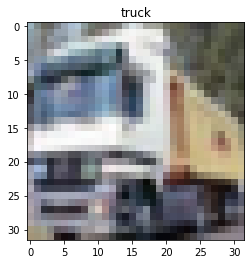

In [ ]:
img = train_images[1]
plt.imshow(img)
plt.title(classes[train_labels[1][0]])

In [ ]:
from skimage import transform
from skimage.transform import rotate,AffineTransform,warp
from skimage.util import random_noise
from skimage.filters import gaussian
from scipy import ndimage

*1) Rotation* (5 samples)

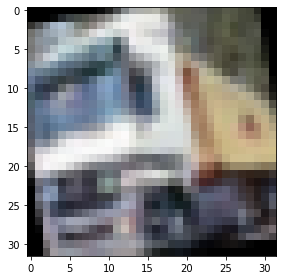

In [ ]:
figuree = plt.figure(tight_layout = 'auto')
rotate10 = rotate(img,angle=10)
plt.imshow(rotate10)

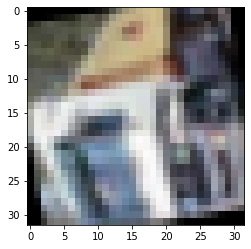

In [ ]:
rotate100 = rotate(img,angle=100)
plt.imshow(rotate100)

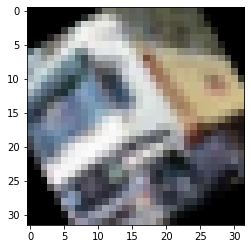

In [ ]:
rotate30 = rotate(img,angle=30)
plt.imshow(rotate30)

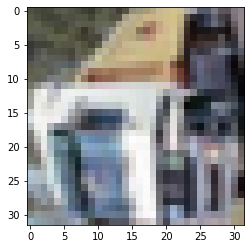

In [ ]:
rotate90 = rotate(img,angle=90)
plt.imshow(rotate90)

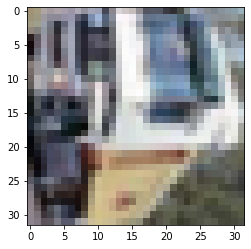

In [ ]:
rotate270 = rotate(img,angle=270)
plt.imshow(rotate270)

*2) noise*


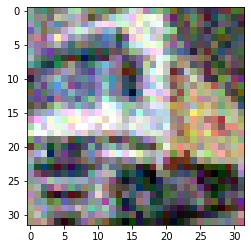

In [ ]:
noisy = random_noise(img)
plt.imshow(noisy)

*3) blur*

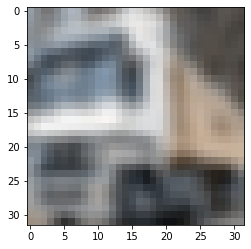

In [ ]:
blur_image = ndimage.uniform_filter(img)
plt.imshow(blur_image)

*4) flip*
(2 samples)

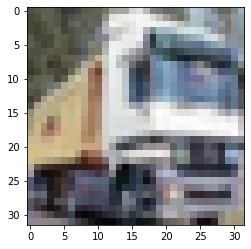

In [ ]:
lr_flip = tf.image.flip_left_right(img)
plt.imshow(lr_flip)

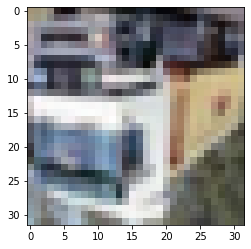

In [ ]:
ud_flip = tf.image.flip_up_down(img)
plt.imshow(ud_flip)

*5) rescale*

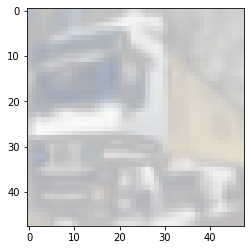

In [ ]:
rescaled = transform.rescale(img, 1.5)
plt.imshow(rescaled)

**2.3 Adding new data using Data augmentation techniques**

In [50]:
X_new_train= []
X_new_labels = []

j=0
k = 0
for i in range(len(train_labels)):
  if classes[train_labels[i][0]] == 'cat':
    if j < 500:
      X_new_train.append(train_images[i])
      X_new_labels.append(train_labels[i])
      j += 1
    else:
      continue
  elif classes[train_labels[i][0]] == 'dog':
    if k < 500:
      X_new_train.append(train_images[i])
      X_new_labels.append(train_labels[i])
      k += 1
    else:
      continue
  else:
      X_new_train.append(train_images[i])
      X_new_labels.append(train_labels[i])

In [51]:
new_train = np.array(X_new_train)
new_labels = np.array(X_new_labels)

In [52]:
model2 = keras.Sequential()
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model2.add(BatchNormalization())
model2.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D((2, 2)))
model2.add(Dropout(0.2))
model2.add(Flatten())
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dropout(0.2))
model2.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dropout(0.2))
model2.add(Dense(64, activation='relu', kernel_initializer='he_uniform'))
model2.add(Dropout(0.2))
model2.add(Dense(10, activation='softmax'))

In [53]:
model2.compile(optimizer='adam', loss=losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [54]:
history = model2.fit(new_train, new_labels, batch_size=32, epochs=20, validation_data=(test_images, test_labels))

Epoch 1/20
1282/1282 [==============================] - 34s 25ms/step - loss: 1.6520 - accuracy: 0.3815 - val_loss: 1.9087 - val_accuracy: 0.4204
Epoch 2/20
1282/1282 [==============================] - 29s 22ms/step - loss: 1.1616 - accuracy: 0.6020 - val_loss: 1.3602 - val_accuracy: 0.5701
Epoch 3/20
1282/1282 [==============================] - 28s 22ms/step - loss: 0.9111 - accuracy: 0.7045 - val_loss: 1.1692 - val_accuracy: 0.6246
Epoch 4/20
1282/1282 [==============================] - 28s 22ms/step - loss: 0.7637 - accuracy: 0.7562 - val_loss: 1.0913 - val_accuracy: 0.6473
Epoch 5/20
1282/1282 [==============================] - 29s 23ms/step - loss: 0.6638 - accuracy: 0.7901 - val_loss: 1.0417 - val_accuracy: 0.6681
Epoch 6/20
1282/1282 [==============================] - 28s 22ms/step - loss: 0.5959 - accuracy: 0.8123 - val_loss: 0.9770 - val_accuracy: 0.6862
Epoch 7/20
1282/1282 [==============================] - 28s 22ms/step - loss: 0.5383 - accuracy: 0.8302 - val_loss: 0.9171 -

In [62]:
prediction = model2.predict(test_images)
prediction_labels = []
for i in range(len(test_labels)):
  prediction_labels.append(np.argmax(prediction[i]))
# pred_labels = [np.argmax(preds[i]) for i in range(len(test_labels))]
print(classification_report(test_labels, prediction_labels))

              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1000
           1       0.93      0.92      0.93      1000
           2       0.64      0.81      0.71      1000
           3       0.68      0.32      0.43      1000
           4       0.72      0.82      0.77      1000
           5       0.75      0.46      0.57      1000
           6       0.70      0.94      0.80      1000
           7       0.80      0.90      0.84      1000
           8       0.82      0.95      0.88      1000
           9       0.90      0.91      0.90      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.76     10000
weighted avg       0.78      0.78      0.76     10000



Because the data has been removed the accuracy has been reduced to 78 percent

In [64]:
print('Confusion matrix : \n',confusion_matrix(test_labels,prediction_labels))

Confusion matrix : 
 [[766   6  51   4  35   2  10   6 100  20]
 [  9 923   3   1   3   0   5   1  25  30]
 [ 44   0 805  14  44  17  51  17   7   1]
 [ 22   3 137 317 110 120 180  65  22  24]
 [ 14   2  63   8 818   2  52  32   9   0]
 [ 10   1 144 103  84 456  86 100  10   6]
 [  4   0  28   6  10   1 937   5   9   0]
 [  7   1  22   9  33  10  10 897   3   8]
 [ 18   5   4   2   0   0   6   2 947  16]
 [  9  52   1   1   1   0   7   1  16 912]]
